# Introduction to Convolutional Neural Networks and Computer vision with Tensorflow
> Computer Vision is the practice of writing algorithms which
can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in the front

### Get the Food 101 dataset from [here](https://www.kaggle.com/datasets/dansbecker/food-101?select=food-101.zip)

>We first start with smaller dataset, i.e., only pizza and steak from the Food101 dataset, so that we can experiment quickly and figure out what works and what doesn't before scaling up.

>**So start by this code cell below** 👇

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-01-19 17:30:04--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.207, 172.253.118.207, 74.125.200.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  22.9MB/s    in 5.6s    

2024-01-19 17:30:10 (18.5 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



📝Note: Check the files section to find the train and test folders of pizza and steak images

## Inspect the data (becoming one with it)

A very crucial step at the beginning of any machine learning project is becoming
one with the data.

And for a computer vision project, this usually means visuallizing many samples of the data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:
import os

# Walkthrough the pizza_steak directory and list the number of files

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [ ]:
# Getting the classnames programmatically

import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # It will create a list of class_names from the subdirectory
print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  print(random_image)

  img = mpimg.imread(target_folder + "/"+ random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

['816577.jpg']
Image shape: (512, 384, 3)


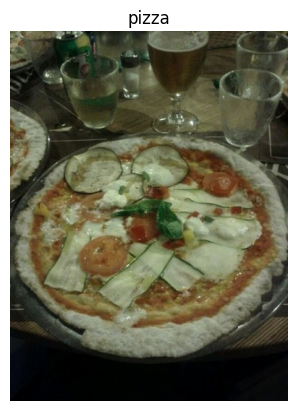

In [ ]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[ 93,  97,  60],
        [101, 105,  68],
        [102, 106,  69],
        ...,
        [ 99,  97,  49],
        [ 92,  88,  41],
        [ 81,  77,  30]],

       [[ 92,  96,  59],
        [101, 105,  68],
        [101, 105,  68],
        ...,
        [ 95,  92,  47],
        [ 81,  78,  33],
        [ 66,  63,  18]],

       [[ 70,  76,  40],
        [ 79,  85,  49],
        [ 83,  89,  53],
        ...,
        [ 88,  86,  47],
        [ 65,  63,  24],
        [ 44,  42,   3]],

       ...,

       [[  3,   3,  11],
        [  3,   3,  11],
        [  1,   2,   7],
        ...,
        [  8,  10,   9],
        [  9,  11,  10],
        [ 11,  13,  12]],

       [[  1,   1,   9],
        [  1,   1,   9],
        [  2,   1,   7],
        ...,
        [ 10,  12,  11],
        [ 11,  13,  12],
        [ 11,  13,  12]],

       [[  1,   1,   9],
        [  2,   2,  10],
        [  3,   2,   8],
        ...,
        [ 12,  14,  1

In [ ]:
# View the image shape
img.shape # returns width, height, color channels

(512, 384, 3)

> 🔑 **Note**: As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also referred to as normalize) their pixel values by dividing the image arrays by 255.

## An end-to-end example

Let's build a CNN to find patterns in our images, more specifically we need a way to:

* Load our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data
* [CNN Explainer](https://poloclub.github.io/cnn-explainer/) - An awesome website illustrating the working of CNNs

> 📝**Note**: Before running the cell below, make sure that you've changed the runtime type to T4 GPU

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Normalizing/Scaling
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#   Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
# Building a CNN model ( same as the Tiny VGG )

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 22s 346ms/step - loss: 0.6044 - accuracy: 0.6500 - val_loss: 0.4464 - val_accuracy: 0.8120
Epoch 2/5
47/47 [==============================] - 10s 215ms/step - loss: 0.4716 - accuracy: 0.7973 - val_loss: 0.4283 - val_accuracy: 0.8000
Epoch 3/5
47/47 [==============================] - 7s 150ms/step - loss: 0.4541 - accuracy: 0.8000 - val_loss: 0.3863 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 6s 126ms/step - loss: 0.3797 - accuracy: 0.8407 - val_loss: 0.3655 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 6s 118ms/step - loss: 0.2963 - accuracy: 0.8753 - val_loss: 0.3417 - val_accuracy: 0.8520


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

> 🔑 **Note**: You can think of trainable parameters as *patterns a model can learn from data.* Intuitiely, you might think more is better. And in some cases it is. But in this case, the difference here is in the two different styles of model we're using. Where a series of dense layers have a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image.** So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in decphering between different features in an image.

## Binary Classification: Let's break it down

1. Becoming one with the data
2. Preprocess the data
3. Create the model
4. Fit the model
5. Evaluate the model
6. Adjust the different parameters and improve the model (Beat the Baseline!)
7. Repeat until satisfied (experiment, experiment, experiment)


['2796102.jpg']
Image shape: (384, 512, 3)
['398565.jpg']
Image shape: (512, 384, 3)


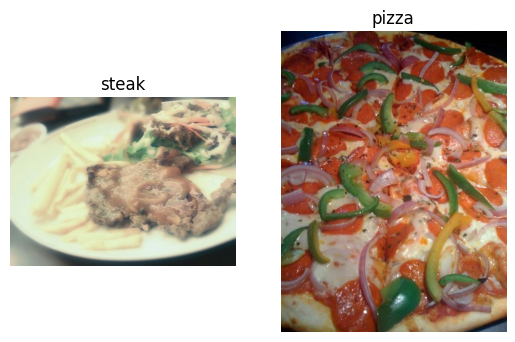

In [ ]:
# Visualize the data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
steak_img = view_random_image("pizza_steak/train/", "pizza")

In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches.**

A batch is a small subset of data. Rather than looking at all 10k images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10k images (or more) might not fit into the memory of your processor(GPU).
2. Trying to learn the pattern in 10k images in one hit could result in the model not being able to learn very well.
3. Why 32? =>  'cause it's good for your health. ;)

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories and turn them into batches

train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [ ]:
len(train_data), 1500/32 # batch size

(47, 46.875)

In [ ]:
# Get the first 2 images
images[:2], images[0].shape

(array([[[[0.41960788, 0.24705884, 0.07058824],
          [0.4156863 , 0.24313727, 0.06666667],
          [0.39607847, 0.22352943, 0.04705883],
          ...,
          [0.47450984, 0.28235295, 0.12156864],
          [0.48235297, 0.2901961 , 0.12941177],
          [0.48235297, 0.2901961 , 0.12941177]],
 
         [[0.3921569 , 0.21960786, 0.04313726],
          [0.4039216 , 0.23137257, 0.05490196],
          [0.427451  , 0.25490198, 0.07843138],
          ...,
          [0.46274513, 0.27058825, 0.10980393],
          [0.46274513, 0.27058825, 0.10980393],
          [0.4666667 , 0.27450982, 0.1137255 ]],
 
         [[0.4039216 , 0.23137257, 0.05490196],
          [0.39607847, 0.22352943, 0.04705883],
          [0.39607847, 0.22352943, 0.04705883],
          ...,
          [0.43921572, 0.24705884, 0.08627451],
          [0.45882356, 0.26666668, 0.10588236],
          [0.46274513, 0.27058825, 0.10980393]],
 
         ...,
 
         [[0.38823533, 0.34901962, 0.3137255 ],
          [0.40784

In [ ]:
labels

array([0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.],
      dtype=float32)

## Creating a baseline CNN model

A *baseline model* is a relatively simple model or existing result that you setup when
beginning a ML experiment and then as you keep experimenting, you try to beat the baseline

📝**Note:** In deep learning, there is almost an infinite amount of architechtures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required

In [ ]:
# Making the creation of our model a little simpler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Creating the model ( a 3-layer, baseline CNN model)
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)), # input layer
    Conv2D(10,3, activation="relu"),
    Conv2D(10,3, activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid") # output layer
])

Great! We've got a simple convolutional neural network architecture ready to go.

And it follows the typical CNN structure of:

Input -> Conv + ReLU layers (non-linearities) -> Pooling layer -> Fully connected (dense layer) as Output

Let's discuss some of the components of the ```Conv2D``` layer:

* The "```2D```" means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel invididually.

* ```filters``` - these are the number of "feature extractors" that will be moving over our images.

* ```kernel_size``` - the size of our filters, for example, a kernel_size of (3, 3) (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.

* ```stride``` - the number of pixels a filter will move across as it covers the image. A stride of 1 means the filter moves across each pixel 1 by 1. A stride of 2 means it moves 2 pixels at a time.

* ```padding``` - this can be either 'same' or 'valid', 'same' adds zeros to outside of the image so the resulting output of the convolutional layer is the same as the input, where as 'valid' (default) cuts off excess pixels where the filter doesn't fit (e.g. 224 pixels wide divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end.

In [ ]:
model_4.compile(loss="binary_crossentropy",
                optimizer = Adam(),
                metrics=["accuracy"])

In [ ]:
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history_4 = model_4.fit(train_data, #combination of labels and sample data
                      epochs=5,
                      steps_per_epoch = len(train_data),
                      validation_data = test_data,
                      validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 138ms/step - loss: 0.7685 - accuracy: 0.7113 - val_loss: 0.4289 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 7s 149ms/step - loss: 0.3975 - accuracy: 0.8327 - val_loss: 0.3582 - val_accuracy: 0.8640
Epoch 3/5
47/47 [==============================] - 8s 163ms/step - loss: 0.3275 - accuracy: 0.8700 - val_loss: 0.4807 - val_accuracy: 0.7480
Epoch 4/5
47/47 [==============================] - 6s 131ms/step - loss: 0.2390 - accuracy: 0.9200 - val_loss: 0.3972 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 8s 160ms/step - loss: 0.1276 - accuracy: 0.9593 - val_loss: 0.3707 - val_accuracy: 0.8540


<Axes: >

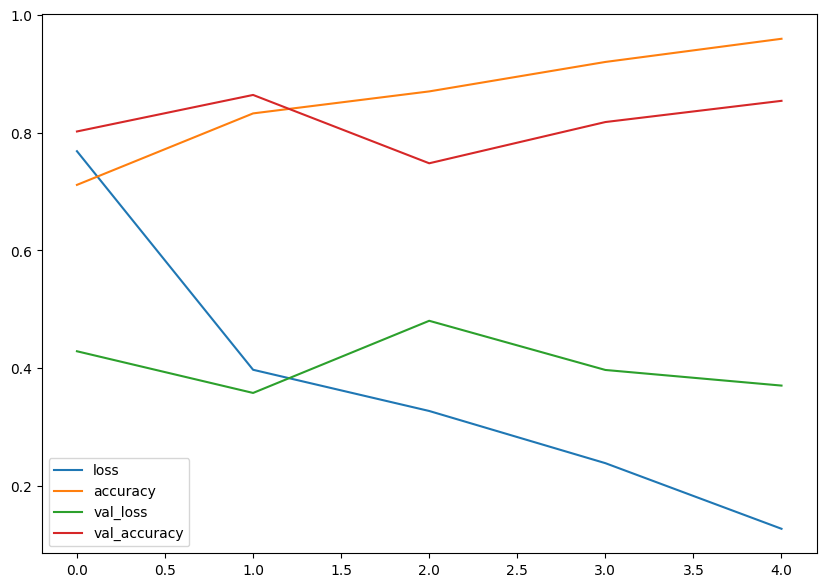

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [ ]:
# Plotting the validation and training curves separately

def plot_loss_curves(history):
  loss=history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"]))

  # Plotting Loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plotting Accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

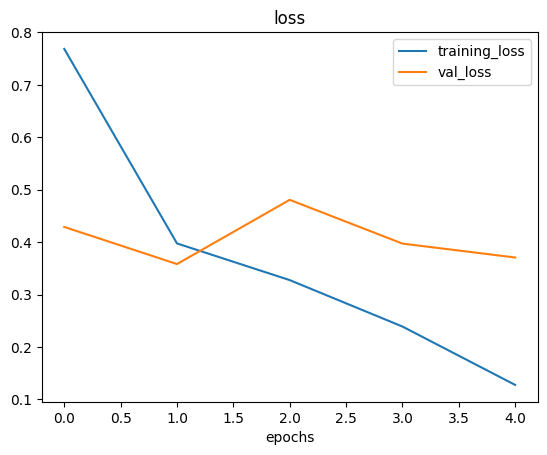

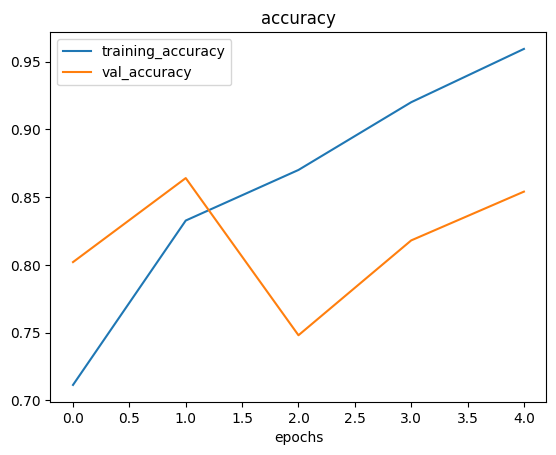

In [ ]:
plot_loss_curves(history_4)

> 🔑 **Note:** When a model's **validation loss** starts to increase, it's likely, that the model is overfitting the training dataset

### Adjusting the model performance

Ways to induce overfitting:
* Increase the number of conv layers.
* Increase the number of conv filters.
* Add another dense layer to the output of our flattened layer.


Reduce overfitting
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data.........

> 🔑**Note:** Reducing overfitting is also known as **regularization.**


### Creating a new baseline model

In [ ]:
model_5 = Sequential([
    Conv2D(10,3,activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [ ]:
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
history_5 = model_5.fit(train_data,
                      epochs=5,
                      steps_per_epoch = len(train_data),
                      validation_data = test_data,
                      validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 14s 260ms/step - loss: 0.6036 - accuracy: 0.6653 - val_loss: 0.4360 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 10s 218ms/step - loss: 0.4682 - accuracy: 0.7807 - val_loss: 0.3768 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 6s 121ms/step - loss: 0.4124 - accuracy: 0.8093 - val_loss: 0.3561 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 7s 144ms/step - loss: 0.3929 - accuracy: 0.8253 - val_loss: 0.3797 - val_accuracy: 0.8060
Epoch 5/5
47/47 [==============================] - 6s 127ms/step - loss: 0.3747 - accuracy: 0.8320 - val_loss: 0.3263 - val_accuracy: 0.8640


In [ ]:
model_5.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7d67b042feb0>>

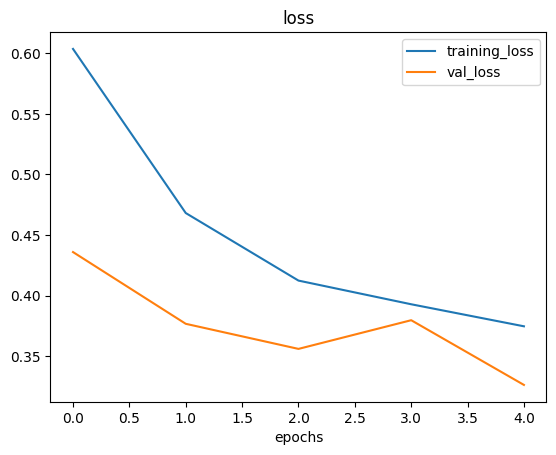

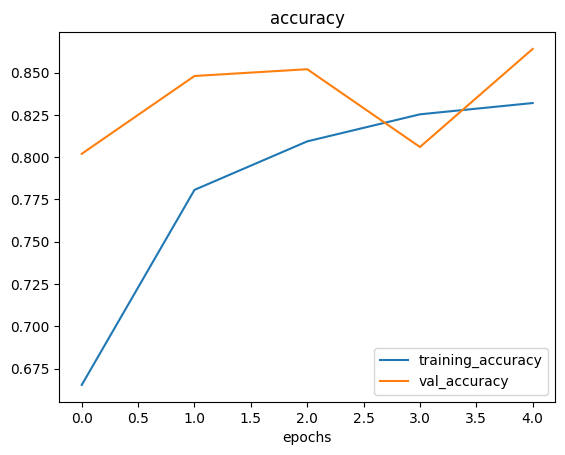

In [ ]:
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.3,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Creating ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Creating ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)



🤔 **Question:** What's data augmentation?

**Data augmentation** is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.



Doing this simulates the kind of data a model might be used on in the real world.



If we're building a pizza vs. steak application, not all of the images our users take might be in similar setups to our training data. Using data augmentation gives us another way to prevent overfitting and in turn make our model more generalizable.

> 🔑 **Note:** Data augmentation is usally only performed on the training data. Using the ImageDataGenerator built-in data augmentation parameters our images are left as they are in the directories but are randomly manipulated when loaded into the model.

In [ ]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False)

# Create non-augmented train data batches
print("Non-augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

# Create non-augmented test data batches
print("Non-augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                            )

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

showing image number: 27


(-0.5, 223.5, 223.5, -0.5)

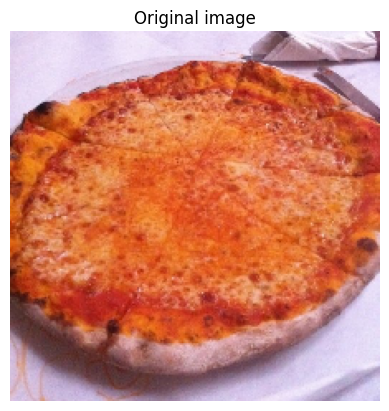

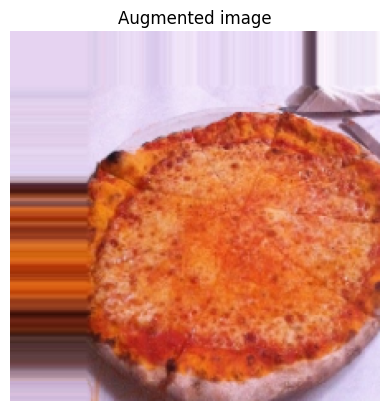

In [ ]:
# Show the original image and the augmented image
import random
random_number = random.randint(0,32) # our batch size is 32
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

In [ ]:
model_6 = Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 492ms/step - loss: 0.7235 - accuracy: 0.5233 - val_loss: 0.6952 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 24s 512ms/step - loss: 0.6946 - accuracy: 0.5047 - val_loss: 0.6786 - val_accuracy: 0.6940
Epoch 3/5
47/47 [==============================] - 25s 529ms/step - loss: 0.6933 - accuracy: 0.5247 - val_loss: 0.6685 - val_accuracy: 0.6800
Epoch 4/5
47/47 [==============================] - 24s 504ms/step - loss: 0.6960 - accuracy: 0.5033 - val_loss: 0.6643 - val_accuracy: 0.7200
Epoch 5/5
47/47 [==============================] - 24s 498ms/step - loss: 0.6824 - accuracy: 0.5880 - val_loss: 0.5977 - val_accuracy: 0.7380


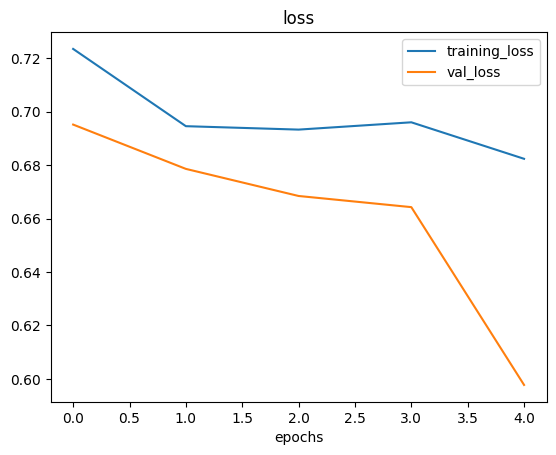

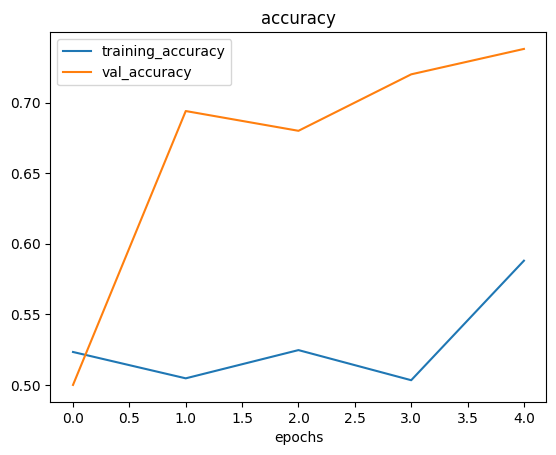

In [ ]:
plot_loss_curves(history_6)

Let's shuffle the training data and train another model on it and see what happens

In [ ]:
# Re-importing data augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224,224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
model_7 = Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data = test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 32s 631ms/step - loss: 0.6720 - accuracy: 0.5980 - val_loss: 0.6221 - val_accuracy: 0.6280
Epoch 2/5
47/47 [==============================] - 22s 474ms/step - loss: 0.5910 - accuracy: 0.6960 - val_loss: 0.4286 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 25s 538ms/step - loss: 0.5174 - accuracy: 0.7360 - val_loss: 0.3816 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 24s 508ms/step - loss: 0.5244 - accuracy: 0.7453 - val_loss: 0.3641 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 24s 512ms/step - loss: 0.4896 - accuracy: 0.7687 - val_loss: 0.3637 - val_accuracy: 0.8400


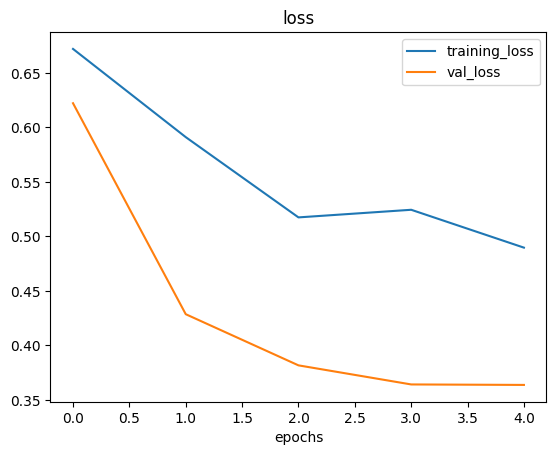

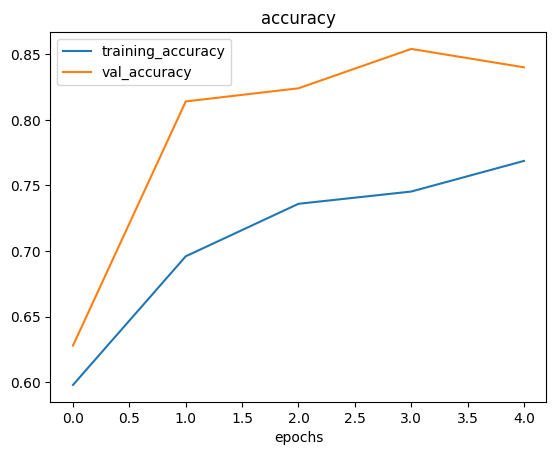

In [ ]:
plot_loss_curves(history_7)

In [ ]:
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 488ms/step - loss: 0.6712 - accuracy: 0.5887 - val_loss: 0.4983 - val_accuracy: 0.8000
Epoch 2/5
47/47 [==============================] - 24s 513ms/step - loss: 0.5549 - accuracy: 0.7233 - val_loss: 0.4278 - val_accuracy: 0.8040
Epoch 3/5
47/47 [==============================] - 24s 507ms/step - loss: 0.5585 - accuracy: 0.7280 - val_loss: 0.4387 - val_accuracy: 0.7820
Epoch 4/5
47/47 [==============================] - 25s 536ms/step - loss: 0.5210 - accuracy: 0.7500 - val_loss: 0.3839 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 24s 510ms/step - loss: 0.4972 - accuracy: 0.7600 - val_loss: 0.3763 - val_accuracy: 0.8540


In [ ]:
model_8.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 53, 53, 10)        0         
 ng2D)                                                

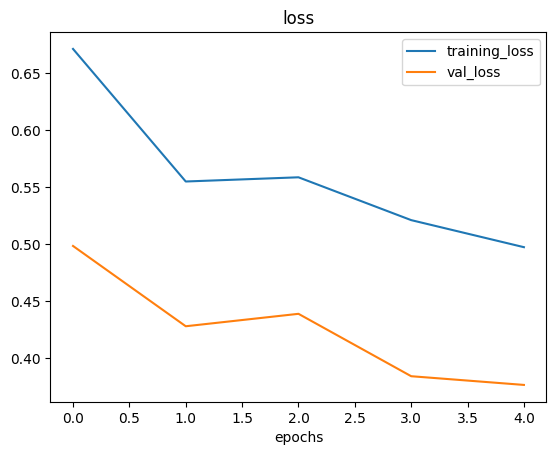

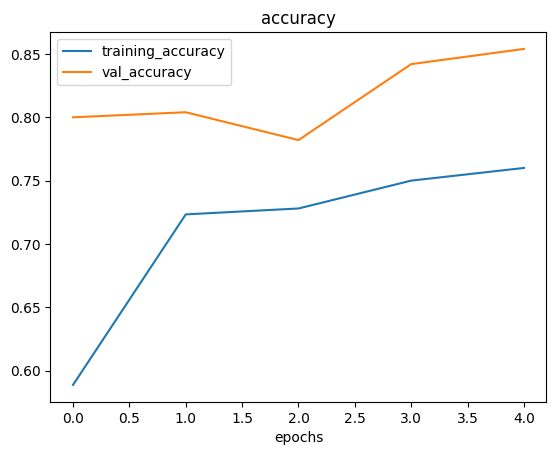

In [ ]:
plot_loss_curves(history_8)

## Making a prediction with our trained model on our own custom data

--2024-01-19 17:41:07--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15814 (15K) [text/plain]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]  15.44K  --.-KB/s    in 0.002s  

2024-01-19 17:41:07 (8.02 MB/s) - ‘03-steak.jpeg.1’ saved [15814/15814]



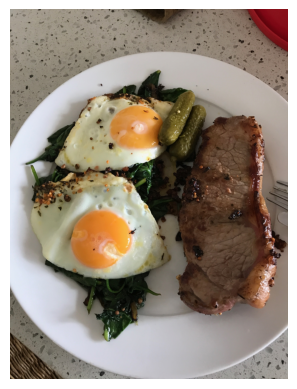

In [ ]:
# View our example steak image
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg
steak = mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis(False);

In [ ]:
steak.shape

(4032, 3024, 3)

> **Note** : When we train a neural network and you want to make a prediction with it on your own custom data (or new data), it's important that your custom data is pre-processed into the same format as the data your model was trained on.

In [ ]:
# Let's create a function to import and resize it to be able to be used with our model

def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename) # read in the image
  img = tf.image.decode_image(img) # decode the read file into a tensor
  img = tf.image.resize(img, size=[img_shape, img_shape]) # resize the image
  img = img/255.
  return img

In [ ]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_8.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 0s 315ms/step


array([[0.8215155]], dtype=float32)

We got a prediction probability in the above code cell.
It would be nice, if we could visualize the image as well as the model's prediction.

Let's do it!!!

In [ ]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names

pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.round(pred))]
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 18ms/step


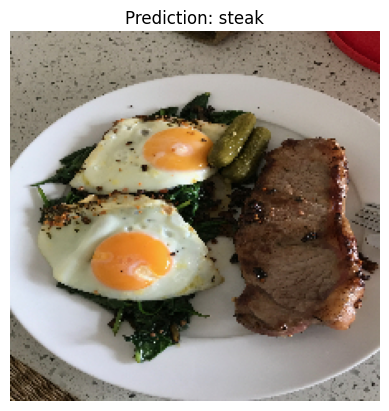

In [ ]:
pred_and_plot(model_8, "03-steak.jpeg")

Hurray!!, The model works!!

----------------xxxx--------------------

#Multi-class image Classification
  >We are gonna take 10 classes now instead of just pizza and steak.The steps we are going to follow are:

1. Becoming one with data
2. Pre-processing the data
3. Create a model
4. Fit the model
5. Evaluate it
6. Adjust different hyper-parameters and improve the model
7. Repeat until satisfied



#1. Importing and becoming one with the data

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()


--2024-01-19 17:41:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.170.207, 74.125.24.207, 142.251.10.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.170.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  22.1MB/s    in 23s     

2024-01-19 17:41:34 (21.3 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

There are 2 directories and 0 images in 10_food_classes_all_data.
There are 10 directories and 0 images in 10_food_classes_all_data/train.
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_curry.
There are 0 directories and 750 images in 10_food_classes_all_data/train/pizza.
There are 0 directories and 750 images in 10_food_classes_all_data/train/hamburger.
There are 0 directories and 750 images in 10_food_classes_all_data/train/sushi.
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_wings.
There are 0 directories and 750 images in 10_food_classes_all_data/train/grilled_salmon.
There are 0 directories and 750 images in 10_food_classes_all_data/train/fried_rice.
There are 0 directories and 750 images in 10_food_classes_all_data/train/steak.
There are 0 directories and 750 images in 10_food_classes_all_data/train/ice_cream.
There are 0 directories and 750 images in 10_food_classes_all_data/train/ramen.
There are 10 directorie

In [ ]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Let's get the class_names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['759025.jpg']
Image shape: (512, 512, 3)


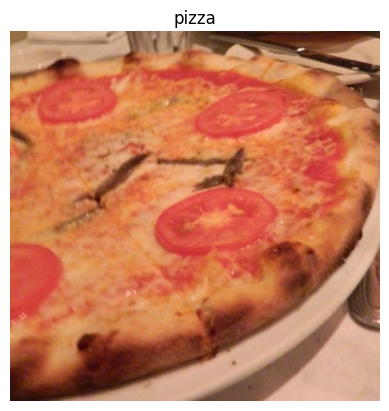

In [ ]:
import random
img = view_random_image(target_dir = train_dir,
                        target_class=random.choice(class_names))

#2. Preprocess the data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescaling
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data_of_10_classes = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical",
                                               )

test_data_of_10_classes = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical",
                                               )

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
for data_batch, labels_batch in train_data_of_10_classes:
    print('Data batch shape:', data_batch.shape)
    print('Labels batch shape:', labels_batch.shape)
    break

Data batch shape: (32, 224, 224, 3)
Labels batch shape: (32, 10)


## Creating a model (starting with the baseline)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation

model_9 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation(activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPooling2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_9 = model_9.fit(train_data_of_10_classes,
                        epochs=5,
                        steps_per_epoch=len(train_data_of_10_classes),
                        validation_data=test_data_of_10_classes,
                        validation_steps=len(test_data_of_10_classes))

Epoch 1/5
235/235 [==============================] - 34s 137ms/step - loss: 2.0974 - accuracy: 0.2400 - val_loss: 1.9448 - val_accuracy: 0.3112
Epoch 2/5
235/235 [==============================] - 35s 149ms/step - loss: 1.8338 - accuracy: 0.3687 - val_loss: 1.8627 - val_accuracy: 0.3440
Epoch 3/5
235/235 [==============================] - 32s 137ms/step - loss: 1.4363 - accuracy: 0.5156 - val_loss: 1.9880 - val_accuracy: 0.3236
Epoch 4/5
235/235 [==============================] - 31s 132ms/step - loss: 0.8409 - accuracy: 0.7300 - val_loss: 2.3164 - val_accuracy: 0.3148
Epoch 5/5
235/235 [==============================] - 39s 166ms/step - loss: 0.3251 - accuracy: 0.9013 - val_loss: 3.3163 - val_accuracy: 0.2960


###Evaluating the model

In [ ]:
# Evaluate on the test data
model_9.evaluate(test_data_of_10_classes)

79/79 [==============================] - 7s 93ms/step - loss: 1.9750 - accuracy: 0.3468


[1.9750269651412964, 0.3467999994754791]

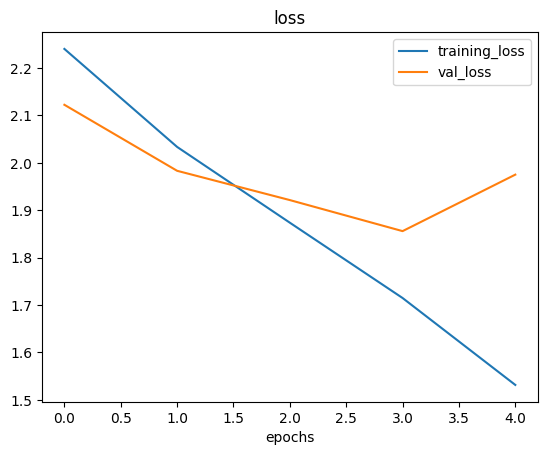

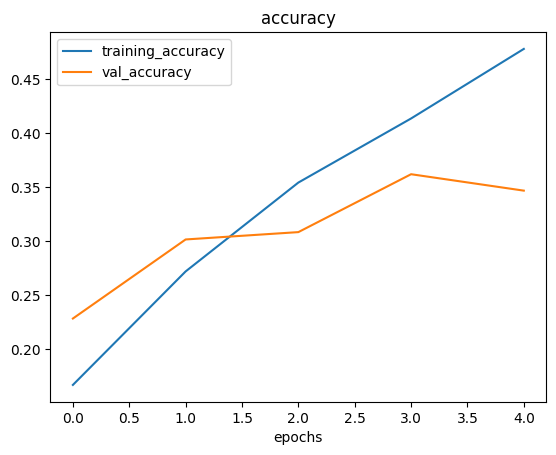

In [ ]:
plot_loss_curves(history_9)

### Looks like the model is overfitted

> We can fix this issue by:
* Getting more data
* Simplifying the model - Reducing the number of layers or hidden units in layers.
* Data augmentation
* Using transfer learning


In [ ]:
# Let's remoce 2 convolutional layers

model_10 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    MaxPooling2D(),  # Corrected here
    Conv2D(10, 3, activation="relu"),
    MaxPooling2D(),  # Corrected here
    Flatten(),
    Dense(10, activation="softmax")  # Corrected here
])

model_10.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_10 = model_10.fit(train_data_of_10_classes,
                        epochs=5,
                        steps_per_epoch=len(train_data_of_10_classes),
                        validation_data=test_data_of_10_classes,
                        validation_steps=len(test_data_of_10_classes))

Epoch 1/5
235/235 [==============================] - 35s 143ms/step - loss: 2.2151 - accuracy: 0.2129 - val_loss: 2.1400 - val_accuracy: 0.2396
Epoch 2/5
235/235 [==============================] - 30s 130ms/step - loss: 1.8402 - accuracy: 0.3701 - val_loss: 1.9530 - val_accuracy: 0.3188
Epoch 3/5
235/235 [==============================] - 29s 125ms/step - loss: 1.4275 - accuracy: 0.5380 - val_loss: 2.1777 - val_accuracy: 0.3008
Epoch 4/5
235/235 [==============================] - 36s 155ms/step - loss: 0.9382 - accuracy: 0.7005 - val_loss: 2.2528 - val_accuracy: 0.2936
Epoch 5/5
235/235 [==============================] - 30s 128ms/step - loss: 0.5101 - accuracy: 0.8584 - val_loss: 2.8080 - val_accuracy: 0.2856


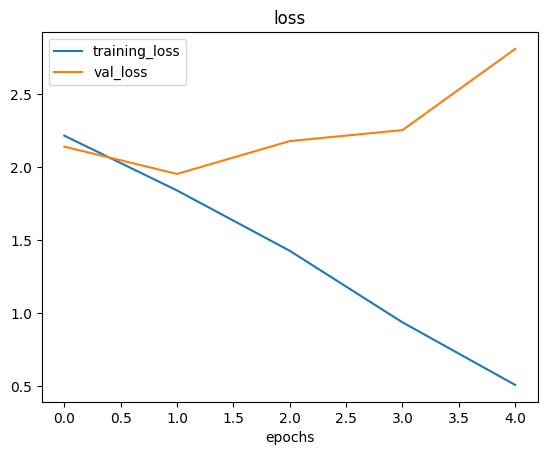

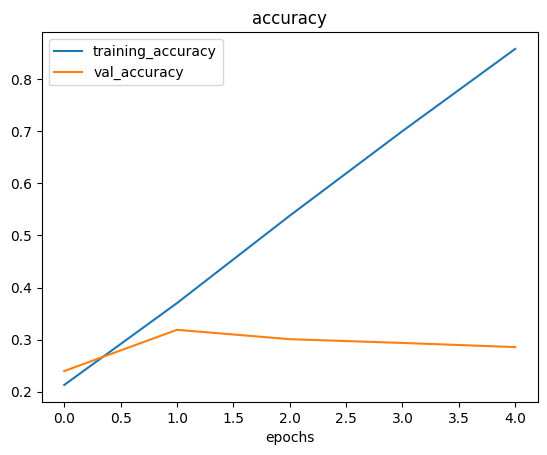

In [ ]:
plot_loss_curves(history_10)

###Let's try data augmentation

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [ ]:
# Let's make another model but this time, fitting it with augmented training data of 10 classes.
model_11 = tf.keras.models.clone_model(model_9)
model_11.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [ ]:
model_11.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_23 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [ ]:
history_11 = model_11.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data = test_data_of_10_classes,
                          validation_steps=len(test_data_of_10_classes))

Epoch 1/5
235/235 [==============================] - 119s 499ms/step - loss: 2.2252 - accuracy: 0.1665 - val_loss: 2.1355 - val_accuracy: 0.2204
Epoch 2/5
235/235 [==============================] - 116s 495ms/step - loss: 2.1008 - accuracy: 0.2380 - val_loss: 1.9575 - val_accuracy: 0.3152
Epoch 3/5
235/235 [==============================] - 114s 485ms/step - loss: 2.0126 - accuracy: 0.2829 - val_loss: 1.9715 - val_accuracy: 0.3076
Epoch 4/5
235/235 [==============================] - 120s 510ms/step - loss: 1.9530 - accuracy: 0.3171 - val_loss: 1.7758 - val_accuracy: 0.3820
Epoch 5/5
235/235 [==============================] - 129s 544ms/step - loss: 1.9208 - accuracy: 0.3312 - val_loss: 1.8502 - val_accuracy: 0.3520


In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [ ]:
# Adjusting function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

Now, We'll make the prediction with our trained model


1/1 [==============================] - 0s 31ms/step


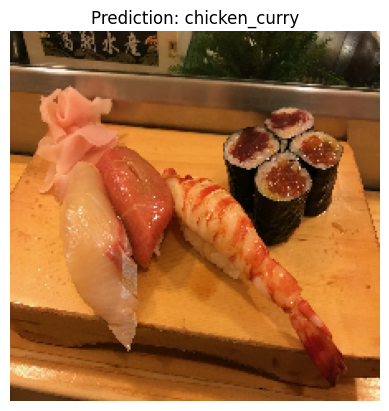

In [ ]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

Don't worry, we'll use transfer learning to improve our model performance in the next notebook

## Saving and Loading the model

In [ ]:
model_11.save("saved_trained_model_11")

In [ ]:
loaded_model_11 = tf.keras.models.load_model("saved_trained_model_11")
loaded_model_11.evaluate(test_data_of_10_classes)

79/79 [==============================] - 9s 107ms/step - loss: 1.8502 - accuracy: 0.3520


[1.8501652479171753, 0.35199999809265137]

Coming up in next notebook => Transfer Learning

#END OF NOTEBOOK